In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the data from file
data=pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
#reading the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
#Checking the no of rows and columns
data.shape

(1460, 81)

In [7]:
#checking the detailed iformation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Checking for the null and missing values
data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
missing = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Missing %"])

In [12]:
missing.index.name = 'Features'
missing.head()

,Missing %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [13]:
# Dataframe containing features with empty values
missing_value = missing[missing["Missing %"] > 0]
missing_value

,Missing %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [14]:
#we drop "PoolQC,MiscFeature,Alley,Fence,FireplaceQu" column because there is missing values which is not required.
data = data.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [15]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Missing %"])
null.index.name = 'Features'
null_data = null[null["Missing %"] > 0]
null_data

,Missing %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [17]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [18]:
#Categorical columns
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# Numeric columns
data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
# now examine at the column with the most missing values.
print('LotFrontage: ',data['LotFrontage'].value_counts())
print('GarageCond: ',data['GarageCond'].value_counts())
print('GarageType: ',data['GarageType'].value_counts())
print('GarageYrBlt: ',data['GarageYrBlt'].value_counts())
print('GarageFinish: ',data['GarageFinish'].value_counts())
print('GarageQual: ',data['GarageQual'].value_counts())
print('BsmtExposure: ',data['BsmtExposure'].value_counts())
print('BsmtFinType2: ',data['BsmtFinType2'].value_counts())
print('BsmtFinType1: ',data['BsmtFinType1'].value_counts())
print('BsmtCond: ',data['BsmtCond'].value_counts())
print('BsmtQual: ',data['BsmtQual'].value_counts())
print('MasVnrArea: ',data['MasVnrArea'].value_counts())
print('MasVnrType: ',data['MasVnrType'].value_counts())
print('Electrical: ',data['Electrical'].value_counts())

LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
GarageCond:  TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
GarageType:  Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageYrBlt:  2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
GarageFinish:  Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
GarageQual:  TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
BsmtExposure:  No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType2:  Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: Bsm

In [21]:
# Because the feature contains outliers, we will use the median to fill in the missing values for the LotFrontage column and GarageYrBlt.
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [22]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [23]:
# Using "mode" we will impute the null values for the below columns.
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
  data[col] = data[col].fillna(data[col].mode()[0])

In [24]:
# Using "mode"we will infer the null values for the "Bsmt" columns.
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
  data[col] = data[col].fillna(data[col].mode()[0])

In [25]:
# Using "mode" we will infer the null values for the columns.
for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
  data[col] = data[col].fillna(data[col].mode()[0])

In [26]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Missing %"])
null.index.name = 'Features'
null_data = null[null["Missing %"] > 0]
null_data

,Missing %
Features,


In [27]:
#checking for the any left null values
data.isnull().values.any()

False

In [28]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [29]:
#checking on the data
data.shape

(1460, 75)

In [30]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
print(data['PoolArea'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [32]:
print(data['MiscVal'].value_counts())

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64


In [33]:
print(data['3SsnPorch'].value_counts())

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [34]:
#We will remove these columns because they are driven by a single value and don't provide any further information for our data.
data = data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [35]:
data.shape

(1460, 72)

In [36]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


In [37]:
#data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


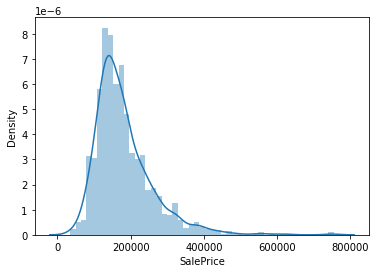

In [38]:
#sales columns visualization
plt.figure()
sns.distplot(data['SalePrice'])
plt.show()

In [39]:
#numeric values
data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


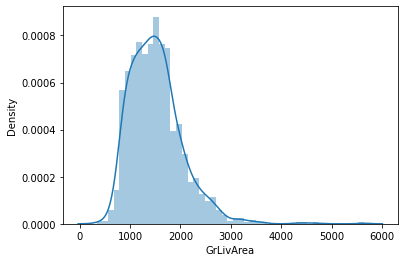

In [40]:
plt.figure()
sns.distplot(data['GrLivArea'])
plt.show()

In [41]:
#Remove the outlier by using IQR
colmn = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']

In [42]:
Q1 = data[colmn].quantile(0.05)
Q3 = data[colmn].quantile(0.95)
IQR = Q3 - Q1

In [43]:
data = data[~((data[colmn] < (Q1 - 1.5 * IQR)) |(data[colmn] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


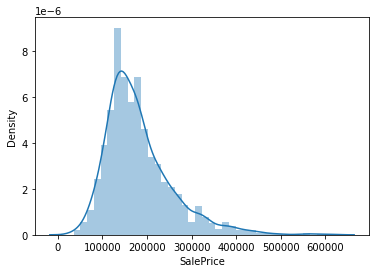

In [44]:
# Sale value visualization
plt.figure()
sns.distplot(data['SalePrice'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


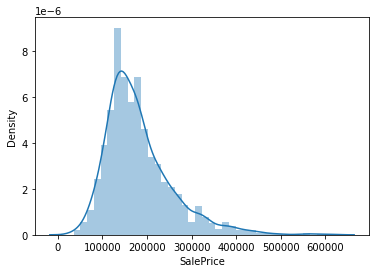

In [45]:
plt.figure()
sns.distplot(data['SalePrice'])
plt.show()

In [46]:
# now we are removing a few outliers.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

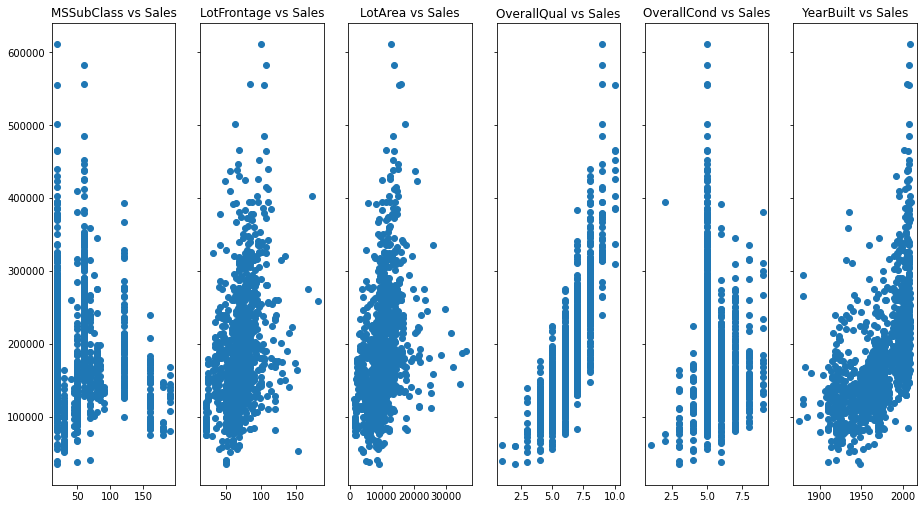

In [47]:
fig, ax = plt.subplots(ncols=6, sharey=True)
MSSubClass = ax[0].scatter(data['MSSubClass'], data['SalePrice'])
MSSubClass.set_label("MSSubClass")

ax[0].set_title('MSSubClass vs Sales')
LotFrontage= ax[1].scatter(data['LotFrontage'], data['SalePrice'])
LotFrontage.set_label("LotFrontage")

ax[1].set_title('LotFrontage vs Sales')
LotArea = ax[2].scatter(data['LotArea'], data['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(data['OverallQual'], data['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(data['OverallCond'], data['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(data['YearBuilt'], data['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

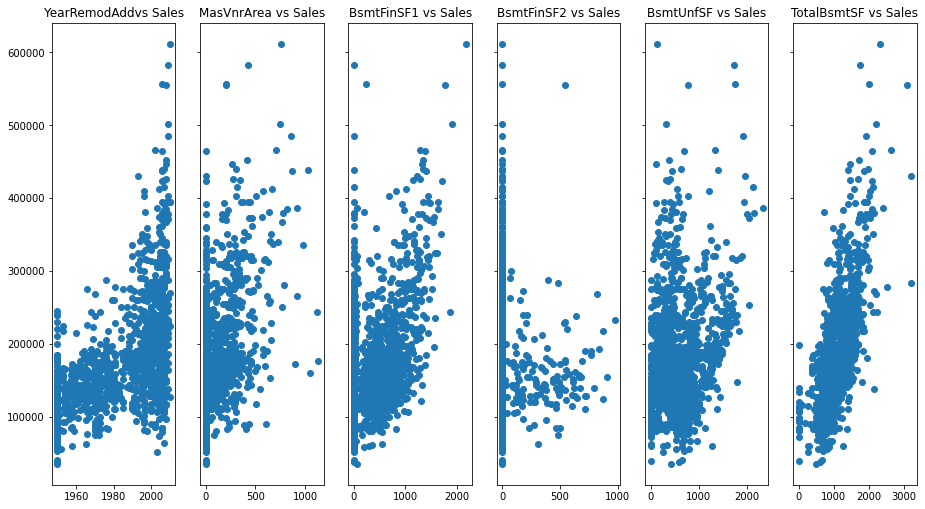

In [48]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(data['YearRemodAdd'], data['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(data['MasVnrArea'], data['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(data['BsmtFinSF1'], data['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(data['BsmtFinSF2'], data['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(data['BsmtUnfSF'], data['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(data['TotalBsmtSF'], data['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

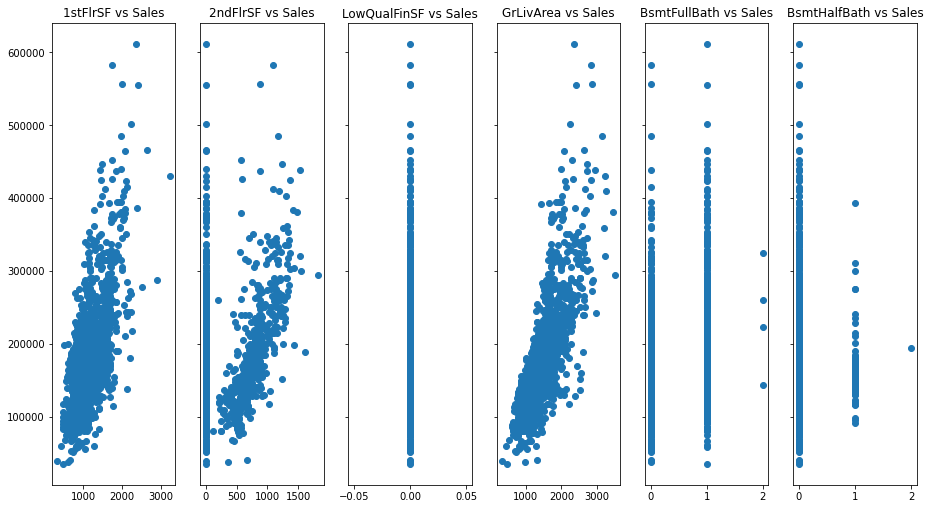

In [49]:
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(data['1stFlrSF'], data['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

ndFlrSF= ax[1].scatter(data['2ndFlrSF'], data['SalePrice'])
ndFlrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(data['LowQualFinSF'], data['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(data['GrLivArea'], data['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(data['BsmtFullBath'], data['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(data['BsmtHalfBath'], data['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

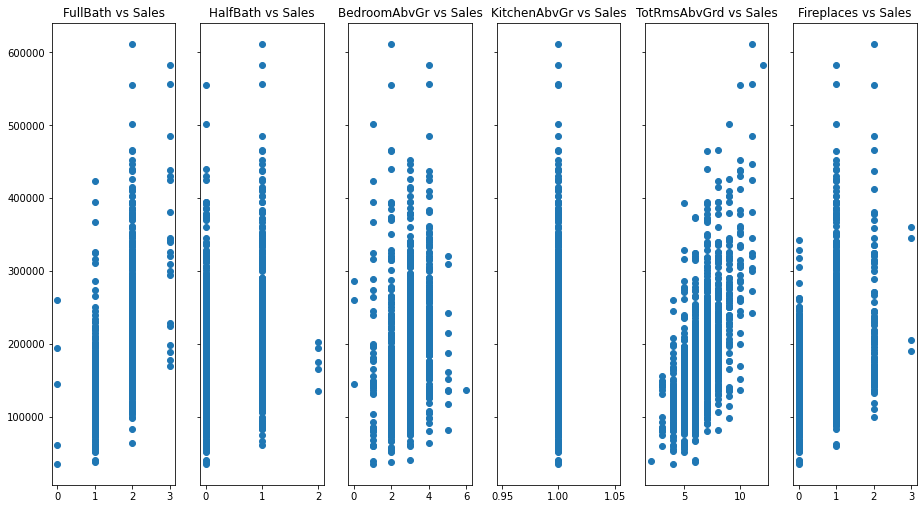

In [50]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(data['FullBath'], data['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(data['HalfBath'], data['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(data['BedroomAbvGr'], data['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(data['KitchenAbvGr'], data['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(data['TotRmsAbvGrd'], data['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(data['Fireplaces'], data['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

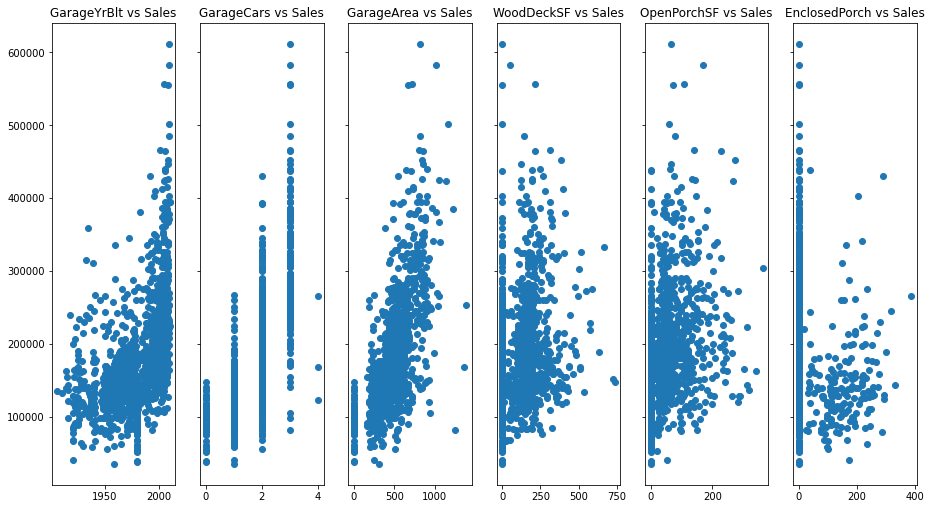

In [51]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(data['GarageYrBlt'], data['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(data['GarageCars'], data['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(data['GarageArea'], data['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(data['WoodDeckSF'], data['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(data['OpenPorchSF'], data['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(data['EnclosedPorch'], data['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

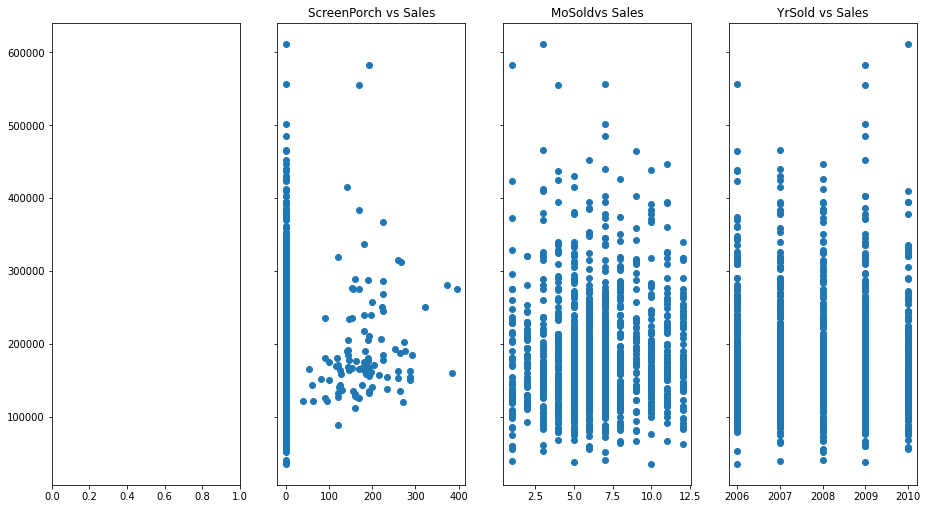

In [52]:
fig, ax = plt.subplots(ncols=4, sharey=True)
ScreenPorch= ax[1].scatter(data['ScreenPorch'], data['SalePrice'])
ScreenPorch.set_label("ScreenPorch")
ax[1].set_title('ScreenPorch vs Sales')

MoSold = ax[2].scatter(data['MoSold'], data['SalePrice'])
MoSold.set_label("MoSold")
ax[2].set_title('MoSoldvs Sales')

YrSold = ax[3].scatter(data['YrSold'], data['SalePrice'])
YrSold.set_label("YrSold")
ax[3].set_title('YrSold vs Sales')

fig.set_size_inches(15.5, 8.5, forward=True)
plt.show()

In [53]:
# dealing with categorical columns

In [54]:
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
#Check the correlation coefficients to determine whether variables have a strog corrleation.

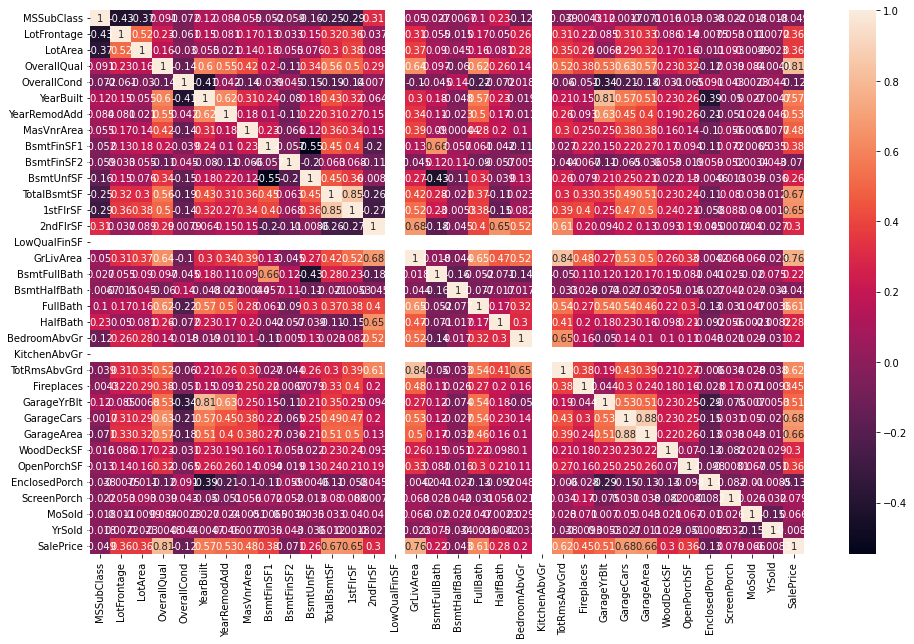

In [56]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [57]:
# matrix of sales price correlation

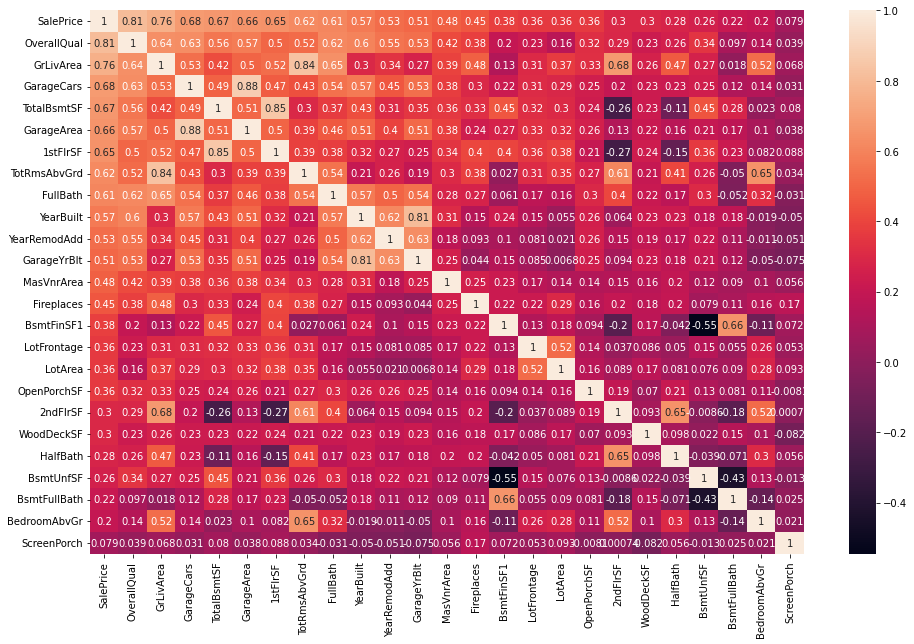

In [58]:
plt.figure(figsize = (16, 10))
n = 25 #The number of factors with the strongest correlation to "Sales price"
corrmat = data.corr()
colmn = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(data[colmn].corr(),annot=True)
plt.show()

In [59]:
#dummy variables

In [60]:
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
#now converting the catogorical value into dummy values.

In [62]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
#splitting the data into train and test
y = data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [64]:
X = data
X.shape

(1333, 221)

In [65]:
#importing the train_test_split for splitting the data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,60,69.0,8963,8,9,1976,1996,289.0,575,80,...,0,0,0,0,1,0,0,0,1,0
1134,60,57.0,8773,6,5,1997,1997,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,0,0,0,0,1,0,0,0,1,0
43,20,69.0,9200,5,6,1975,1980,0.0,280,491,...,0,0,0,0,1,0,0,0,1,0


In [69]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)

X_train shape (893, 221)
X_test shape (440, 221)


In [70]:
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

y_train shape (893,)
y_test shape (440,)


In [71]:
#Numerical variable scaling

In [72]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,60,69.0,8963,8,9,1976,1996,289.0,575,80,...,0,0,0,0,1,0,0,0,1,0
1134,60,57.0,8773,6,5,1997,1997,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,0,0,0,0,1,0,0,0,1,0
43,20,69.0,9200,5,6,1975,1980,0.0,280,491,...,0,0,0,0,1,0,0,0,1,0


In [73]:
y_train.head()

1108    181000
745     299800
1134    169000
512     129900
43      130250
Name: SalePrice, dtype: int64

In [74]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,60,82.0,9452,8,5,1997,1998,423.0,1074,0,...,0,0,0,0,1,0,0,0,1,0
1161,20,69.0,14778,6,7,1954,2006,72.0,728,0,...,0,0,0,0,1,0,0,0,1,0
1369,20,48.0,10635,8,5,2003,2003,171.0,370,972,...,0,0,0,0,1,0,0,0,1,0
329,70,60.0,6402,5,5,1920,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
262,80,88.0,8471,6,7,1977,1995,46.0,506,0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
y_test.head()

990     348000
1161    224000
1369    232000
329      78000
262     151000
Name: SalePrice, dtype: int64

In [76]:
#scaling of the column
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [77]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']

In [78]:
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,...,1,2000.0,2,463,100,48,0,0,11,2007
745,60,69.0,8963,8,9,1976,1996,289.0,575,80,...,2,1994.0,2,831,0,204,0,0,7,2008
1134,60,57.0,8773,6,5,1997,1997,0.0,0,0,...,1,1997.0,2,460,100,38,0,0,8,2007
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,0,1964.0,2,624,0,0,0,0,7,2006
43,20,69.0,9200,5,6,1975,1980,0.0,280,491,...,0,1977.0,1,308,145,0,0,0,7,2008


In [79]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000
mean,54.048152,69.053751,9759.436730,6.106383,5.592385,1973.202688,1985.810750,103.936170,447.098544,40.530795,...,0.003359,0.001120,0.086226,0.001120,0.867861,0.0,0.004479,0.014558,0.827548,0.089586
std,41.427593,20.190944,4319.264419,1.325371,1.100157,28.810699,20.471598,174.825318,432.015255,138.048264,...,0.057896,0.033464,0.280855,0.033464,0.338831,0.0,0.066815,0.119841,0.377985,0.285747
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7577.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9375.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,392.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,60.000000,78.000000,11500.000000,7.000000,6.000000,2002.000000,2004.000000,160.000000,728.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,2188.000000,906.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [80]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,60,69.0,8063,6,5,2000,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,60,69.0,8963,8,9,1976,1996,289.0,575,80,...,0,0,0,0,1,0,0,0,1,0
1134,60,57.0,8773,6,5,1997,1997,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
512,20,70.0,9100,5,5,1958,1958,0.0,521,174,...,0,0,0,0,1,0,0,0,1,0
43,20,69.0,9200,5,6,1975,1980,0.0,280,491,...,0,0,0,0,1,0,0,0,1,0


In [81]:
#Minmax using scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()

In [82]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [83]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,0.235294,0.298137,0.187723,0.555556,0.500,0.932836,0.833333,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
745,0.235294,0.298137,0.213431,0.777778,1.000,0.753731,0.766667,0.255979,0.262797,0.088300,...,0,0,0,0,1,0,0,0,1,0
1134,0.235294,0.223602,0.208004,0.555556,0.500,0.910448,0.783333,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
512,0.000000,0.304348,0.217344,0.444444,0.500,0.619403,0.133333,0.000000,0.238117,0.192053,...,0,0,0,0,1,0,0,0,1,0
43,0.000000,0.298137,0.220201,0.444444,0.625,0.746269,0.500000,0.000000,0.127971,0.541943,...,0,0,0,0,1,0,0,0,1,0


In [84]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,0.235294,0.378882,0.227399,0.777778,0.50,0.910448,0.800000,0.374668,0.490859,0.000000,...,0,0,0,0,1,0,0,0,1,0
1161,0.000000,0.298137,0.379531,0.555556,0.75,0.589552,0.933333,0.063773,0.332724,0.000000,...,0,0,0,0,1,0,0,0,1,0
1369,0.000000,0.167702,0.261190,0.777778,0.50,0.955224,0.883333,0.151461,0.169104,1.072848,...,0,0,0,0,1,0,0,0,1,0
329,0.294118,0.242236,0.140278,0.444444,0.50,0.335821,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
262,0.352941,0.416149,0.199377,0.555556,0.75,0.761194,0.750000,0.040744,0.231261,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [85]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000
mean,0.200283,0.298471,0.236180,0.567376,0.574048,0.732856,0.596846,0.092060,0.204341,0.044736,...,0.003359,0.001120,0.086226,0.001120,0.867861,0.0,0.004479,0.014558,0.827548,0.089586
std,0.243692,0.125410,0.123376,0.147263,0.137520,0.215005,0.341193,0.154850,0.197448,0.152371,...,0.057896,0.033464,0.280855,0.033464,0.338831,0.0,0.066815,0.119841,0.377985,0.285747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.173841,0.444444,0.500000,0.604478,0.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.298137,0.225199,0.555556,0.500000,0.738806,0.750000,0.000000,0.179159,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.235294,0.354037,0.285898,0.666667,0.625000,0.947761,0.900000,0.141718,0.332724,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [86]:
X_train.shape

(893, 221)

In [87]:
#building an model with RFE

In [88]:
#importing the apropriate lib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [89]:
# Executing RFE with the variable's output number set to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 25)             
rfe = rfe.fit(X_train, y_train)

In [90]:
#finding the features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 6),
 ('BsmtHalfBath', False, 5),
 ('FullBath', False, 4),
 ('HalfBath', False, 6),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 6),
 ('GarageYrBlt', False, 5),
 ('GarageCars', True, 1),
 ('GarageArea', False, 5),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 5),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 6),
 ('YrSold', False, 5),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True

In [91]:
colmn = X_train.columns[rfe.support_]

In [92]:
colmn

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

In [93]:
#checking the shape of the train and test

In [94]:
X_train1=X_train[colmn]
X_test1=X_test[colmn]


In [95]:
print(X_train1.shape)
print(X_test1.shape)

(893, 110)
(440, 110)


In [96]:
print(y_train.shape)
print(y_test.shape)

(893,)
(440,)


In [97]:
lm1=lm.fit(X_train, y_train)

In [98]:
# Display the intercept and coefficients.

In [99]:
print(lm1.intercept_)

9946700651480096.0


In [100]:
print(lm1.coef_)

[-1.60519127e+04  1.31267304e+04  3.99620307e+04  5.33532026e+04
  4.41831583e+04  3.61257298e+04  6.18163699e+03  1.86416690e+04
 -8.12017901e+16 -3.36237760e+16 -8.66944157e+16  1.18982148e+17
 -3.77798574e+16 -2.21482352e+16 -9.78784040e+16  4.07906975e+16
  1.61400135e+03 -5.92789811e+03  9.52926593e+03  1.75616665e+03
 -3.54933147e+04 -5.65080106e+16  2.88690130e+04  8.94310888e+02
 -5.49824157e+03  1.98944172e+04 -4.04435700e+03  1.08118381e+04
  1.08795536e+04  5.75587991e+03  2.30024966e+04  8.62476852e+01
 -3.13048832e+03  3.88880000e+04  3.16740000e+04  2.58680000e+04
  1.72395000e+04  4.71170000e+04  2.39000000e+02 -5.32500000e+03
  2.16000000e+03  1.25620000e+04 -1.23245000e+04  3.45600000e+03
 -4.57620000e+04  7.40400000e+03 -5.91234375e+03 -1.40555000e+04
 -2.49200000e+03  2.76000000e+02 -4.61410000e+04  1.45856250e+04
  7.78175000e+03 -6.99800000e+03 -1.92560000e+04 -1.13750000e+04
  7.55000000e+03 -2.08435000e+04 -1.34740000e+04 -1.36700000e+04
  1.89000000e+02 -2.20282

In [101]:
#for model evalution importing the libraries
from sklearn.metrics import r2_score, mean_squared_error

In [102]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9326040833867338
-4.091418073499454e+20
340707812812.0
1.018092665833961e+33
381531705.2765958
2.3138469678044568e+30


In [103]:
#Ridge and Lasso

In [104]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [105]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-16040.154990951825


In [107]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-20369.74012966,  11428.20057818,  29774.29546291,  62715.83918373,
        35587.07946593,  40598.38148125,  21973.62598984,  54117.58234497,
         8944.88684936,   8894.16486596,  45942.01708771,  63864.4446493 ,
        37575.53204912,      0.        ,  79552.97473118, -27446.22965541,
            0.        ,  36795.94659739,  23748.2742907 ,  10330.39145055,
        13037.34684105,  18240.66832898,  25501.5761287 ,   9832.2000016 ,
        11868.02368227,   5988.3097056 ,  36515.29013298, -11124.88941998,
       -17132.70482078, -15347.23891162,  -3111.58861456,  22916.65262916,
        -6072.52500735,  -7490.56717989,  -9464.79323374,  -1128.95151999,
       -10317.23959385,  19211.03174448,  26184.86908277,  39385.96513382,
        -6290.94401357,   7855.66603958, -18472.51328069,   4283.77143467,
        -9710.14504038,  12908.07012093,      0.        ,   7138.95655196,
        -5310.0727356 ,   -444.73376074,  -3524.4221921 ,   3025.06301756,
        13460.2715181 ,  

In [108]:
#Let's compute a few measures, including the R2 score, RSS, and RMSE.

In [109]:
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9277666814811866
0.9194795547558927
365162419348.31335
200363964962.87222
408916483.0328257
455372647.6428914


In [110]:
lasso = Lasso()
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+11, tolerance: 4.035e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.101e+10, tolerance: 4.021e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-16251.058931962038


In [112]:
#the optimum value for alpha is 50

In [113]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train1, y_train)

Lasso(alpha=50)

In [114]:
lasso.coef_

array([-21224.76295746,   8231.32503373,  30517.46001171,  72557.55450592,
        38896.86588808,  45380.36962415,  18034.58673844,  46050.40180199,
         2912.76791001,      0.        ,  53247.15726853,   5879.75052284,
            0.        ,      0.        , 166180.65346949, -30637.5795194 ,
            0.        ,  28112.45450671,  21274.13024191,   8443.15818228,
         9344.8843054 ,  15105.15795871,  17595.16626493,      0.        ,
         3564.13269025,     -0.        ,  41998.05703722, -10806.69441104,
           -0.        , -11485.40827206,     -0.        ,  23568.84715583,
        -3104.25593579,  -5717.51827235,  -6926.86053243,      0.        ,
        -8682.07885367,  17818.9848911 ,  26691.56490962,  42418.32021605,
           -0.        ,      0.        , -16139.02755059,      0.        ,
           -0.        ,   8976.40721932,      0.        ,   6140.25650152,
        -1006.75980643,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [115]:
y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.925224634663218
0.9201977139475486
378013275230.06714
198576925377.1066
423307139.1154167
451311194.0388786


In [116]:
metric2

[0.9277666814811866,
 0.9194795547558927,
 365162419348.31335,
 200363964962.87222,
 20221.6834866147,
 21339.462215409538]

In [117]:
# Making a table with all the metrics in it

In [118]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

In [119]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.326041e-01,9.277667e-01,9.252246e-01
1,R2 Score (Test),-4.091418e+20,9.194796e-01,9.201977e-01
2,RSS (Train),3.407078e+11,3.651624e+11,3.780133e+11
3,RSS (Test),1.018093e+33,2.003640e+11,1.985769e+11
4,MSE (Train),1.953284e+04,2.022168e+04,2.057443e+04
5,MSE (Test),1.521133e+15,2.133946e+04,2.124409e+04


In [120]:
#model evalution
ridge_pred = ridge.predict(X_test1)

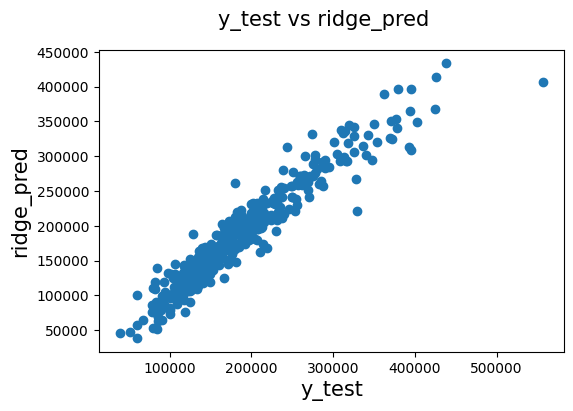

In [121]:
#Understanding the spread for ridge regression by plotting the y test and y pred variables
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=15)             
plt.xlabel('y_test', fontsize=15)                         
plt.ylabel('ridge_pred', fontsize=15)  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


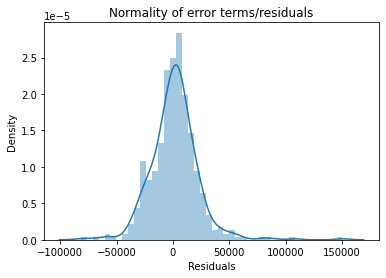

In [122]:
y_res=y_test-ridge_pred
# Distribution of the errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [123]:
lasso_pred = lasso.predict(X_test1)

In [124]:
#To understand the spread for lasso regression, plotting y test and y pred.

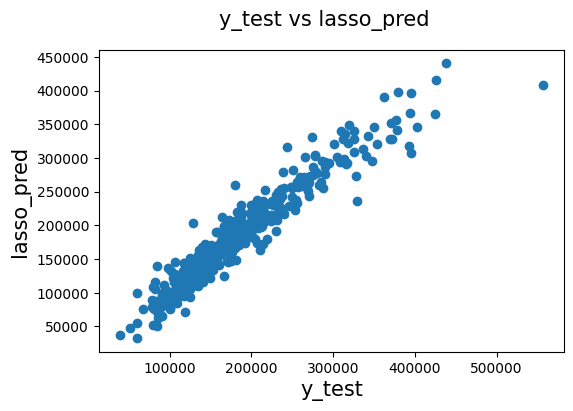

In [125]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=15)               
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('lasso_pred', fontsize=15)  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


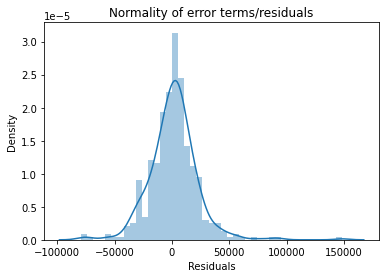

In [126]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [127]:
#Observing how the coefficients change after regularisation.

In [128]:
beta = pd.DataFrame(index=X_train1.columns)

In [129]:
beta.rows = X_train1.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [130]:
beta['Ridge'] = ridge.coef_
beta['Lasso'] = lasso.coef_

In [131]:
pd.set_option('display.max_rows', None)

In [132]:
beta.head(68)

,Ridge,Lasso
MSSubClass,-20369.740130,-21224.762957
LotFrontage,11428.200578,8231.325034
LotArea,29774.295463,30517.460012
OverallQual,62715.839184,72557.554506
OverallCond,35587.079466,38896.865888
YearBuilt,40598.381481,45380.369624
MasVnrArea,21973.625990,18034.586738
BsmtFinSF1,54117.582345,46050.401802
BsmtFinSF2,8944.886849,2912.767910
BsmtUnfSF,8894.164866,0.000000


In [133]:
#1. Which variables are significant in predicting the price of a house

In [134]:
#LotArea
#OverallQual
#OverallCond
#YearBuilt
#BsmtFinSF1
#TotalBsmtSF
#GrLivArea
#TotRmsAbvGrd
#Street_Pave
#RoofMatl_Metal

In [135]:
#2. How well those variables describe the price of a house

In [136]:
#R2 score(Train)
#Ridge Regression : 92.77
#Lasso Regression : 92.52
#R2 score(Test)
#Ridge Regression : 91.94
#Lasso Regression : 92.01

In [137]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.326041e-01,9.277667e-01,9.252246e-01
1,R2 Score (Test),-4.091418e+20,9.194796e-01,9.201977e-01
2,RSS (Train),3.407078e+11,3.651624e+11,3.780133e+11
3,RSS (Test),1.018093e+33,2.003640e+11,1.985769e+11
4,MSE (Train),1.953284e+04,2.022168e+04,2.057443e+04
5,MSE (Test),1.521133e+15,2.133946e+04,2.124409e+04


In [138]:
pd.set_option('display.max_rows', None)
beta.head(68)

,Ridge,Lasso
MSSubClass,-20369.740130,-21224.762957
LotFrontage,11428.200578,8231.325034
LotArea,29774.295463,30517.460012
OverallQual,62715.839184,72557.554506
OverallCond,35587.079466,38896.865888
YearBuilt,40598.381481,45380.369624
MasVnrArea,21973.625990,18034.586738
BsmtFinSF1,54117.582345,46050.401802
BsmtFinSF2,8944.886849,2912.767910
BsmtUnfSF,8894.164866,0.000000
